In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Directorios
base = '/content/drive/MyDrive/Notebooks/ML'
trains = '/content/drive/MyDrive/Notebooks/ML/train'
tests = '/content/drive/MyDrive/Notebooks/ML/test'

train_datagen = ImageDataGenerator(
    # Preprocesar y generar imagenes nuevas
    rescale = 1./255,
    rotation_range = 5,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.3,
    horizontal_flip = True,
    brightness_range = [0.8, 1.5],
    validation_split = 0.20
)

train_gen = train_datagen.flow_from_directory(
    trains,
    target_size = (255, 255),
		color_mode='rgba',
    batch_size = 10,
    class_mode = "binary", # Solo dos clases
    subset = 'training',
    shuffle = True
)

val_gen = train_datagen.flow_from_directory(
    trains,
    target_size = (255, 255),
 		color_mode='rgba',
    batch_size = 10,
    class_mode = "binary", # Solo dos clases
    subset = 'validation',
    shuffle = False
)

Found 3240 images belonging to 2 classes.
Found 808 images belonging to 2 classes.


(10, 255, 255, 4)
[1. 0. 1. 1. 1. 0. 0. 1. 0. 0.]


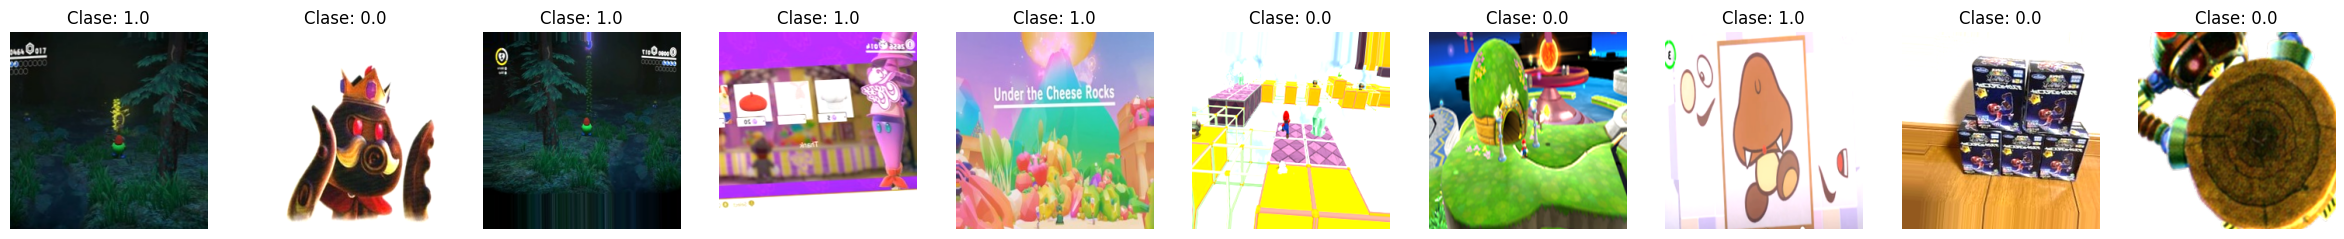

<Figure size 640x480 with 0 Axes>

In [4]:
# Ver batch
images, labels = train_gen[0]
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

print(images.shape)
# Output: Batch size, img width, img height, amount of params per pixel
print(labels)
# Output: Clase en forma de binario

plt.figure()

for i in range(images.shape[0]):
    axarr[i].imshow(images[i])
    axarr[i].set_title(f"Clase: {labels[i]}")
    axarr[i].axis("off")

In [5]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(5, (3, 3), activation="relu", input_shape = (255,255,4),))
# Input shape is size x, size y, and spectrums(rgba)
model.add(layers.Conv2D(10, (3, 3), activation="relu"))
model.add(layers.Conv2D(20, (3, 3), activation="relu"))
model.add(layers.Conv2D(25, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 5)    │           185 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 251, 251, 10)   │           460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 249, 249, 20)   │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 247, 247, 25)   │         4,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1525225)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │   390,457,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390,481,359 (1.45 GB)

 Trainable params: 390,481,359 (1.45 GB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
						train_gen,
						validation_data = val_gen,
						verbose = 1,
						epochs = 16)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/16
324/324 ━━━━━━━━━━━━━━━━━━━━ 138s 390ms/step - accuracy: 0.5189 - loss: 1.3047 - val_accuracy: 0.5012 - val_loss: 0.7659
Epoch 2/16
324/324 ━━━━━━━━━━━━━━━━━━━━ 117s 360ms/step - accuracy: 0.6202 - loss: 0.6716 - val_accuracy: 0.5334 - val_loss: 0.7144
Epoch 3/16
324/324 ━━━━━━━━━━━━━━━━━━━━ 118s 365ms/step - accuracy: 0.6741 - loss: 0.6079 - val_accuracy: 0.5186 - val_loss: 0.7580
Epoch 4/16
324/324 ━━━━━━━━━━━━━━━━━━━━ 114s 352ms/step - accuracy: 0.6921 - loss: 0.5895 - val_accuracy: 0.5557 - val_loss: 0.7368
Epoch 5/16
324/324 ━━━━━━━━━━━━━━━━━━━━ 118s 364ms/step - accuracy: 0.7196 - loss: 0.5788 - val_accuracy: 0.5693 - val_loss: 0.7272
Epoch 6/16
324/324 ━━━━━━━━━━━━━━━━━━━━ 116s 359ms/step - accuracy: 0.7277 - loss: 0.5315 - val_accuracy: 0.5668 - val_loss: 0.7263
Epoch 7/16
324/324 ━━━━━━━━━━━━━━━━━━━━ 115s 355ms/step - accuracy: 0.7321 - loss: 0.5433 - val_accuracy: 0.5569 - val_loss: 0.7257
Epoch 8/16
324/324 ━━━━━━━━━━━━━━━━━━━━ 117s 361ms/step - accuracy: 0.7536 -

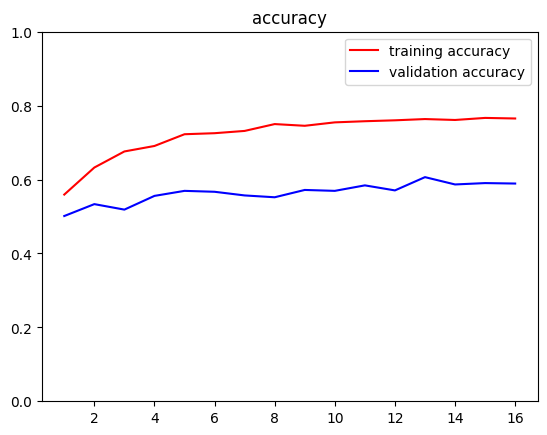

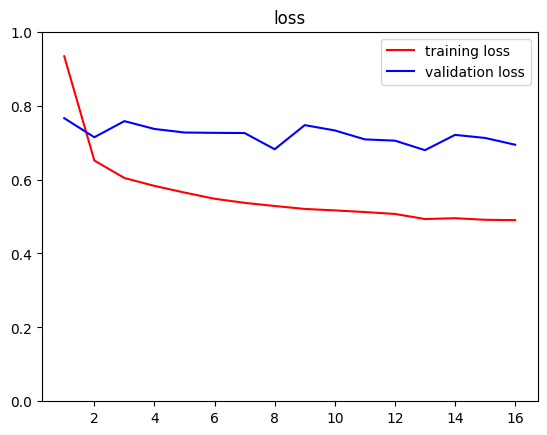

In [8]:
epochs = range(1, len(history.history["accuracy"])+1)
plt.plot(epochs,history.history["accuracy"],label='training accuracy', color = "red")
plt.plot(epochs,history.history["val_accuracy"],label='validation accuracy', color = "blue")
plt.ylim(0,1)
plt.title('accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,history.history["loss"], label ='training loss', color = "red")
plt.plot(epochs,history.history["val_loss"], label='validation loss', color = "blue")
plt.ylim(0,1)
plt.title('loss')
plt.legend()
plt.show()

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
					tests,
					target_size = (255, 255),
					color_mode='rgba',
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_gen, steps = 25)
print(f'\ntest ac  {test_acc:.4f}:\n')


Found 1012 images belonging to 2 classes.
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.7138 - loss: 0.5472

test ac  0.7060:



(20, 255, 255, 4)
[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.]


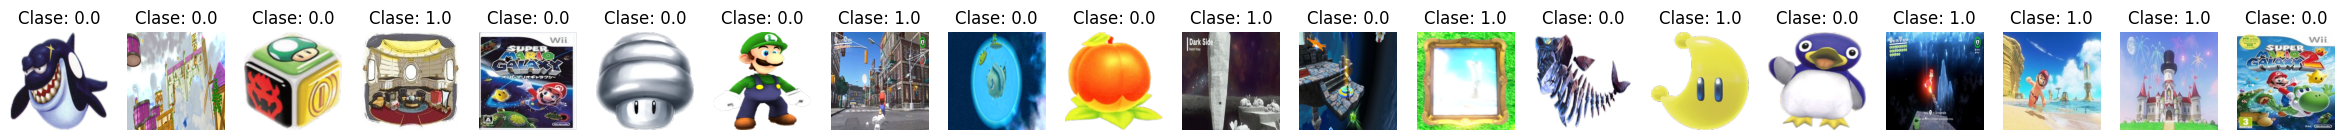

<Figure size 640x480 with 0 Axes>

In [10]:
# View batch
imagest, labelst = test_gen[0]
f, axarr = plt.subplots(1, imagest.shape[0], figsize=(30, 4))

print(imagest.shape)
# Output: Batch size, img width, img height, amount of params per pixel
print(labelst)
# Output: Clase en forma de binario

plt.figure()

for i in range(imagest.shape[0]):
    axarr[i].imshow(imagest[i])
    axarr[i].set_title(f"Clase: {labelst[i]}")
    axarr[i].axis("off")

In [11]:
val_loss, val_acc = model.evaluate(val_gen, steps = 25)
print('\nval acc :\n', val_acc)

25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 353ms/step - accuracy: 0.7380 - loss: 0.5754

val acc :
 0.6679999828338623


In [14]:
# Preciser predictions
y_pred_probs = model.predict(test_gen)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

# Trues
y_true = test_gen.classes
# Class names
class_labels = list(test_gen.class_indices.keys())

# Metric breakdown
print("Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step
Report:

              precision    recall  f1-score   support

         SMG       0.48      0.51      0.50       506
         SMO       0.48      0.46      0.47       506

    accuracy                           0.48      1012
   macro avg       0.48      0.48      0.48      1012
weighted avg       0.48      0.48      0.48      1012



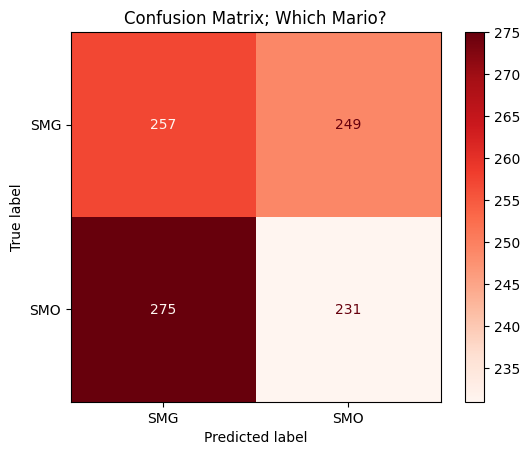

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Show matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_gen.class_indices.keys()))
cm_display.plot(cmap='Reds')
plt.title("Confusion Matrix; Which Mario?")
plt.show()

In [ ]:
model.save('which_mario.keras')